<img align="right" src="../img/DEP.png" width="400px">

# Deep Learning on Red Wine Quality dataset (with Python)

Contributor: Wu, Ze Wen (https://github.com/zewenwu)

In this notebook, we will explore some of the basic capabilities of Python's **Tensorflow** package for the data science's role to work with regression datasets. For numerical analysis of tabular data, we shall use the Pandas package, which includes specific data types and functions for working with two-dimensional tables of data in Python. The Pandas package offers a more convenient structure to work with data - the DataFrame.

*Supervised* machine learning techniques involve in training a machine learning model that utilizes a set of *features* to predict a *label* using a dataset that includes already-known label values. This can be mathematically formulated as 
$$y = f([x_1, x_2, x_3, ...]),$$
where $f$ represents a function that maps the features to the label.

*Classification* is a form of supervised machine learning in which you train a model to use the features (the ***x*** = $[x_1, x_2, x_3, ...]$ values in our function) to predict a label (***y***) that calculates the probability of the observed case belonging to each of a number of possible classes, and predicting an appropriate label. The simplest form of classification is *binary* classification, in which the label is 0 or 1, representing one of two classes; for example, "True" or "False"; "Risk" or "No-risk"; "Profitable" or "Non-Profitable"; and so on. 

A popular machine learning model are artificial neural networks from the Data science field of Deep Learning. These models are based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. We shall use **TensorFlow** Python package to create artificial neural network models in this tutorial.

In this tutorial, we shall use the Red Wine Quality dataset from [kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009). The dataset is related to red variant of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009](https://www.researchgate.net/publication/221612614_Using_Data_Mining_for_Wine_Quality_Assessment). Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). The dataset can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones). We shall consider it as a classification problem, trying to predict the quality ranking of the wine samples.

Contents:
- Explore and preprocess data 
- Split data into training data and test data
- Train classification model using **TensorFlow**
- Save your model and inference new cases.
- Appendix 1: Other file formats

What you will learn:
- Exploring and preprocessing data for training classification machine learning models.
- Explore the artificial neural network models as classification machine learning models of **TensorFlow**.
- Save the trained machine learning model and import it to make new predictions.

Remark:
- You have to run the code cells in sequence. Some code blocks may depend on variables from previous code blocks.
- If you are executing this tutorial on a local computer, please setup the Anaconda3 Python environment before executing the following Python codes. In the Big Data Test Infrastructure (BDTI), this Python environment will be set up for you. Furthermore, you can utilize the BDTI resources to do computational heavy calculations and data storage.

Source:
- [Microsoft's ml-basics tutorials](https://github.com/MicrosoftDocs/ml-basics)
- [Pandas documentation](https://pandas.pydata.org/docs/)
- [Matplotlib documentation](https://matplotlib.org/3.3.2/contents.html)
- [Guide of TensorFlow](https://www.tensorflow.org/guide) 

## Explore and preprocess data

Let us import the Medical dataset. The dataset is saved in the folder *online-data* in *csv-format*. This is a common data format where the information is delimited using a symbol such as **,** or **;**. 

To import this data as a Pandas DataFrame into the memory of Python, the **read_csv** method can be used from the Pandas package. In this method, you need to provide which **delimiter** that is used in the dataset and whether a **header** is present. The header can contain schema information about what the numbers of the data represents. More information on Pandas DataFrame can be found in the [Pandas documentation](https://pandas.pydata.org/docs/).

Remark: 
- To import data from other file formats, please look into Appendix 1.

In [1]:
import pandas as pd

# load the training dataset
wine = pd.read_csv('../online-data/winequality-red.csv', delimiter=',', header='infer')
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

We observe that we have data on 1599 wine samples and that the last column contains information of
- **quality** (A score given to the wine samples, a value between 0 and 10.)

Furthermore, eleven real-valued features are available for each wine sample, based on physicochemical tests:
- **fixed acidity**, **volatile acidity**, **citric acid**, **residual sugar**, **chlorides**, **free sulfur dioxide**, **total sulfur dioxide**, **density**, **pH**, **sulphates**, **alcohol**.


The first step in any machine learning project is to explore the data that you will use to train a model. The goal of this exploration is to try to understand the relationships between its attributes; in particular, any apparent correlation between the *features* and the *label* your model will try to predict. This may require some work 
- to detect and fix issues in the data (such as dealing with missing values, errors, or outlier values), 
- deriving new feature columns by transforming or combining existing features (a process known as *feature engineering*), 
- *normalizing* numeric features (values you can measure or count) so they're on a similar scale, 
- and *encoding* categorical features (values that represent discrete categories) as numeric indicators.

Let us extract the wine features of the dataset, see if we have any missing values and describe the statistical measures of these wine features. Like this,

In [2]:
# Extract the wine features
feature_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", 
                 "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
features = wine[feature_names]
features.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [3]:
features.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

We observe that we do not have any missing values, which is great news! However, we see that the value ranges of the features can deviate quite a lot from each other. We can standardize these features using by calculating the mean and the standard deviation of each column of the features. This can be achieved using the **mean** and **std** methods of the Pandas Data Frame.

In [4]:
features_scaled = (features - features.mean())/features.std()
features_scaled.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.599000e+03      1.599000e+03  1.599000e+03    1.599000e+03   
mean    3.554936e-16      1.688594e-16 -1.066481e-16   -1.110917e-16   
std     1.000000e+00      1.000000e+00  1.000000e+00    1.000000e+00   
min    -2.136377e+00     -2.277567e+00 -1.391037e+00   -1.162333e+00   
25%    -7.004996e-01     -7.696903e-01 -9.290275e-01   -4.530767e-01   
50%    -2.410190e-01     -4.367545e-02 -5.634264e-02   -2.402999e-01   
75%     5.056370e-01      6.264921e-01  7.650078e-01    4.340257e-02   
max     4.353787e+00      5.876138e+00  3.742403e+00    9.192806e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.599000e+03         1.599000e+03          1.599000e+03  1.599000e+03   
mean   2.132961e-16        -6.221137e-17          2.666202e-17 -3.469617e-14   
std    1.000000e+00         1.000000e+00          1.000000e+00  1.000000e+00   
min   -1.603443e+00        -1.422055e+00         -1.230199e+00 -3.537625e+00   
25%   -3.711129e-01        -8.484502e-01         -7.438076e-01 -6.075656e-01   
50%   -1.798892e-01        -1.792441e-01         -2.574163e-01  1.759533e-03   
75%    5.382858e-02         4.899619e-01          4.721707e-01  5.766445e-01   
max    1.112355e+01         5.365606e+00          7.372847e+00  3.678904e+00   

                 pH     sulphates       alcohol  
count  1.599000e+03  1.599000e+03  1.599000e+03  
mean   2.861723e-15  6.665504e-16  7.109871e-17  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -3.699244e+00 -1.935902e+00 -1.898325e+00  
25%   -6.549356e-01 -6.380200e-01 -8.661079e-01  
50%   -7.210449e-03 -2.250577e-01 -2.092427e-01  
75%    5.757422e-01  4.238832e-01  6.352984e-01  
max    4.526866e+00  7.916200e+00  4.201138e+00

For feature engineering, we wonder whether we can somehow reduce the number of wine features in such a way that information of these features are lost minimally. One method we can try is to use PCA to calculate principal components of the wine features.

For more information about PCA, please consult its [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

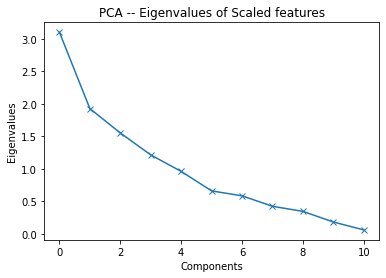

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA Analysis of the wine features
pca = PCA(n_components=11).fit(features_scaled)
eigenvalues = pca.explained_variance_

# Plot a scatter plot
%matplotlib inline
plt.plot(eigenvalues, "x-")
plt.xlabel('Components')
plt.ylabel('Eigenvalues')
plt.title('PCA -- Eigenvalues of Scaled features')
plt.show()

The above plot represent how much information we will lose if we select principal components fewer than the number of original features. For example,

In [6]:
# Keeping a certain number of PCs
keep = 5
kept_percentage = sum(eigenvalues[:keep])/sum(eigenvalues)
print("Keeping %s%% percent of the features using PCA." %str(round(100*kept_percentage, 2)))

Keeping 79.53% percent of the features using PCA.


In [7]:
# Reduce the number of features to the chosen PCs
pca_keep = PCA(n_components=keep).fit(features_scaled)
features_pca = pca_keep.transform(features_scaled)

# Convert the PCA output back to a Pandas Data Frame.
features_pca = pd.DataFrame(features_pca)
features_pca

0         1         2         3         4
0    -1.619023  0.450809 -1.773899  0.043727  0.066994
1    -0.798920  1.855972 -0.911405  0.547895 -0.018386
2    -0.748245  0.881763 -1.171028  0.410892 -0.043517
3     2.356935 -0.269892  0.243413 -0.928160 -1.498680
4    -1.619023  0.450809 -1.773899  0.043727  0.066994
...        ...       ...       ...       ...       ...
1594 -2.149828  0.814031  0.616870  0.407559 -0.240861
1595 -2.213804  0.892822  1.806837  0.413874  0.119555
1596 -1.455674  0.311648  1.123888  0.491723  0.193655
1597 -2.269808  0.979485  0.627768  0.639570  0.067714
1598 -0.426841 -0.536522  1.628446 -0.391593  0.450341

[1599 rows x 5 columns]

## Split data into training data and test data

Let us now do prepare the dataset for training a machine learning model. We can extract the dataset into a dataset with the features ***X*** and the label ***y***. We use the chose PCA components as ***X*** and choose the wine quality column of the original dataset as ***y***.

In [8]:
# Split by features and label
X = features_pca
y = wine["quality"]

# Check the results
for i in range(0,4):
    print("Wine", str(i+1), "\n  Features:",list(X.iloc[i]), "\n  Label:", y.iloc[i], "\n")

Wine 1 
  Features: [-1.6190233807579966, 0.45080905961032447, -1.7738991977808736, 0.043726631711278156, 0.06699352236466187] 
  Label: 5 

Wine 2 
  Features: [-0.7989199991107647, 1.855972434219162, -0.9114050402286639, 0.5478945679146946, -0.018385809332480265] 
  Label: 5 

Wine 3 
  Features: [-0.7482450101761097, 0.8817630087259823, -1.1710278819774569, 0.41089212727580415, -0.04351739268101681] 
  Label: 5 

Wine 4 
  Features: [2.356935284408826, -0.2698915759120442, 0.24341254697786857, -0.9281596146904999, -1.498680217162525] 
  Label: 6 



In machine learning, we construct a training dataset and a test dataset. The training dataset is, as the name suggests, for optimizing the untrained machine learning model into a machine learning model that recognizes the underlying relations and patterns of the dataset. The model is said to be *fitted* to the dataset. However, to evaluate the performance of the trained model, we measure its performance on a separate dataset, the test dataset.

In the python **scikit-learn** package, we can use a **train_test_split** method that ensures we get a statistically random split of training and test data. We'll use that to split the data into 80% for training and hold back 20% for testing.

In [9]:
from sklearn.model_selection import train_test_split

# Split data 80%-20% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 1279
Test cases: 320


Now we have the following four datasets:

- **X_train**: The feature values we'll use to train the model
- **y_train**: The corresponding labels we'll use to train the model
- **X_test**: The feature values we'll use to validate the model
- **y_test**: The corresponding labels we'll use to validate the model

## Train classification model using **TensorFlow**

### Constructing the model

One of the machine learning models that can be used for this classification dataset is an artificial neural network, which we shall construct using the **TensorFlow** Python package. However, we shall first transform training data and test data in a more compatible format for TensorFlow functions.

In [10]:
from tensorflow.keras import utils

# Set data types for float features
X_train2 = X_train.astype('float32')
X_test2 = X_test.astype('float32')

# Set data types for float labels
y_train2 = utils.to_categorical(y_train)
y_test2 = utils.to_categorical(y_test)

print('Datasets ready to be trained...')

Datasets ready to be trained...


Now we're ready to define our neural network. In this case, we'll create a network that consists of 3 fully-connected layers:
* An input layer that receives an input value for each feature (in this case, the number of PC of the PCA) and applies a *ReLU* activation function.
* A hidden layer that receives ten inputs and applies a *ReLU* activation function.
* An output layer that uses a *SoftMax* activation function to generate an output for each wine ranking (which represent the classification probabilities for each of the possible wine rankings). Softmax functions produce a vector with probability values that sum to 1.

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np

# Setting a random seed for reproducibility.
tensorflow.random.set_seed(0)

print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

# Define a classifier network
hl = 10 # Number of hidden layer nodes
nb_wine_classes = y_train2.shape[1]

model = Sequential()
model.add(Dense(hl, input_dim=keep, activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(nb_wine_classes, input_dim=hl, activation='softmax'))

print(model.summary())

Keras version: 2.5.0
TensorFlow version: 2.5.0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 99        
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________
None


### Training the model

Now that we have a untrained model, we can use it to train on the training data we have constructed. Training neural networks requires choosing an *optimizer*. The trained model can be evaluated using the test data we have constructed.

For this tutorial we shall use an *Adam optimizer*. This optimizer is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. According to [Kingma et al., 2014](https://arxiv.org/abs/1412.6980), the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters". This method requires a parameter called the *learning rate*, **lr**. 

For more information about the implementation of the Adam algorithm from TensorFlow, please consult its [TensorFlow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).

Data Scientist refer the parameters that you need to provide to the learning algorithm as *hyperparameter*, a number that you have to provide to the model, before it trains its *parameters* (the unknown numbers of the model). For simplicity, we shall fix **lr** to a chosen number. In practice, it is best to try a few hyperparameter values and optimize for the best trained model.

In [12]:
from tensorflow.keras import optimizers

# Hyperparameters for optimizer
lr = 0.001
opt = optimizers.Adam(learning_rate=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over some epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 100
history = model.fit(X_train2, y_train2, epochs=num_epochs, batch_size=10, validation_data=(X_test2, y_test2))

Epoch 1/100
128/128 [==============================] - 1s 2ms/step - loss: 2.0394 - accuracy: 0.2549 - val_loss: 1.6739 - val_accuracy: 0.4781
Epoch 2/100
128/128 [==============================] - 0s 725us/step - loss: 1.4631 - accuracy: 0.4848 - val_loss: 1.2543 - val_accuracy: 0.5656
Epoch 3/100
128/128 [==============================] - 0s 771us/step - loss: 1.2195 - accuracy: 0.5192 - val_loss: 1.1320 - val_accuracy: 0.5813
Epoch 4/100
128/128 [==============================] - 0s 775us/step - loss: 1.1369 - accuracy: 0.5442 - val_loss: 1.0826 - val_accuracy: 0.5875
Epoch 5/100
128/128 [==============================] - 0s 752us/step - loss: 1.0916 - accuracy: 0.5489 - val_loss: 1.0576 - val_accuracy: 0.5938
Epoch 6/100
128/128 [==============================] - 0s 998us/step - loss: 1.0630 - accuracy: 0.5520 - val_loss: 1.0367 - val_accuracy: 0.6031
Epoch 7/100
128/128 [==============================] - ETA: 0s - loss: 1.0203 - accuracy: 0.56 - 0s 962us/step - loss: 1.0433 - accu

128/128 [==============================] - 0s 662us/step - loss: 0.9058 - accuracy: 0.6091 - val_loss: 0.9415 - val_accuracy: 0.6125
Epoch 57/100
128/128 [==============================] - 0s 689us/step - loss: 0.9044 - accuracy: 0.6161 - val_loss: 0.9384 - val_accuracy: 0.6187
Epoch 58/100
128/128 [==============================] - 0s 696us/step - loss: 0.9038 - accuracy: 0.6099 - val_loss: 0.9336 - val_accuracy: 0.6219
Epoch 59/100
128/128 [==============================] - 0s 681us/step - loss: 0.9017 - accuracy: 0.6122 - val_loss: 0.9296 - val_accuracy: 0.6250
Epoch 60/100
128/128 [==============================] - 0s 691us/step - loss: 0.9015 - accuracy: 0.6099 - val_loss: 0.9310 - val_accuracy: 0.6281
Epoch 61/100
128/128 [==============================] - 0s 703us/step - loss: 0.9007 - accuracy: 0.6153 - val_loss: 0.9373 - val_accuracy: 0.6219
Epoch 62/100
128/128 [==============================] - 0s 712us/step - loss: 0.9006 - accuracy: 0.6114 - val_loss: 0.9385 - val_accuracy

After training is complete, we can examine the loss metrics we recorded while training and testing the model in each epoch. We want two observations to occur:
- The loss should reduce with each epoch, showing that the model is learning the right weights and biases to predict the correct labels.
- The training loss and test loss should follow a similar trend, showing that the model is not overfitting to the training data.

Let's plot the loss metrics and see:

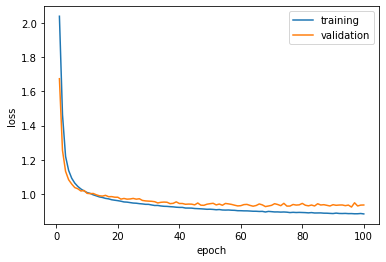

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

# Extracting the learning metrics
epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]

# Visualizing the learning curve
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

The trained model consists of the final weights and biases that were determined by the optimizer during training. Based on our network model we should expect the following values for each layer:
- Layer 1: There are input values determined by the PCA going to ten output nodes, so there should be *keep* x 10 weights and 10 bias values.
- Layer 2: There are ten input values going to ten output nodes, so there should be 10 x 10 weights and 10 bias values.
- Layer 3: There are ten input values going to the number of wine rankings, so there should be 10 x 9 weights and 9 bias values.

In [14]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[-0.4725538  -0.60155356 -0.00361731  0.5093496  -0.00445077  0.31760353
   0.13802025  0.59102666 -0.04821415 -0.84210503]
 [-0.26191965  0.83640146  0.02208816 -0.23273735 -0.47823387  0.3626739
   0.8039375   0.92008746  0.705314   -0.6745685 ]
 [-0.49669343 -0.4783386   0.06075249  0.51244044  0.6231138   0.07058374
   0.33357692 -0.21319166 -0.32433844  0.38375208]
 [-1.047532   -0.23484153  0.02766448 -0.4593276   0.08258772  0.5316213
   0.03000217  0.58656543  0.9555744  -0.20663404]
 [-0.54347926 -0.17389524 -0.53279424 -0.06365161  0.28331342 -0.18296854
  -0.40271914  0.07534454 -0.11415642  0.34741178]] 
Biases:
 [ 0.6166304   0.511164    1.2559052  -0.106543    0.51642394 -0.5740457
  0.24484932  1.0768965  -0.27086428  0.22453955]
------------
Weights:
 [[-0.2982064  -0.53021276  0.19804896  0.93809164  0.2174176   0.30596665
  -0.2344328   0.71917355 -0.01012061 -0.1240823 ]
 [ 0.54677373  0.33057636 -0.73260444  0.53391325 -0.7458391   0.749257
 

Now that we have a trained model, we can use it to predict our test dataset using its **predict** method, like this,

In [15]:
class_probabilities = model.predict(X_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test2, axis=1)

print('Predicted labels: ', predictions)
print('Actual labels:    ', true_labels)

Predicted labels:  [5 5 7 5 5 5 5 6 5 5 5 5 5 6 6 6 7 5 6 5 6 6 6 7 6 5 5 7 5 6 6 6 6 5 6 7 5
 6 6 6 5 6 7 7 6 5 5 6 6 6 5 6 6 7 5 5 5 5 7 6 5 6 6 6 5 6 5 6 6 6 5 5 5 5
 6 6 5 5 6 7 5 5 6 6 6 5 7 5 5 5 5 5 6 5 6 5 6 5 5 6 7 6 6 7 6 6 6 5 6 6 6
 5 6 5 6 6 5 7 6 6 5 6 5 5 6 6 5 5 6 7 5 5 6 6 6 5 6 5 7 5 5 5 5 5 6 6 6 7
 6 5 6 6 5 5 6 5 5 5 6 6 6 6 6 5 5 5 6 6 5 6 7 6 5 7 6 6 6 7 6 5 5 7 6 6 6
 5 6 6 5 6 6 6 6 5 5 5 5 5 6 5 5 6 5 5 5 5 5 6 6 5 6 6 5 7 5 5 6 6 6 5 5 6
 6 6 5 7 6 6 6 5 5 6 5 6 6 6 6 7 6 6 5 6 5 5 6 5 5 5 5 6 5 5 5 5 6 6 5 5 5
 6 5 7 5 6 5 5 6 5 6 7 5 6 5 6 6 6 6 5 6 6 5 7 6 6 6 5 6 5 6 6 6 5 6 6 5 6
 6 6 5 5 6 5 5 6 6 6 5 5 6 5 7 6 6 5 5 6 6 6 5 6]
Actual labels:     [6 5 7 6 5 6 5 6 4 5 5 5 6 5 6 6 7 5 5 4 7 6 6 4 6 5 5 7 5 6 5 6 5 6 7 7 5
 6 6 7 5 7 6 6 5 5 6 6 6 5 5 5 6 6 6 5 5 5 6 5 5 6 6 6 5 6 5 5 6 6 6 6 4 6
 5 6 5 5 5 6 6 5 6 6 6 5 6 5 5 5 5 6 4 5 7 6 6 5 6 5 8 6 6 6 5 5 5 5 7 5 6
 5 7 5 6 6 6 7 6 6 5 7 5 5 6 6 5 5 5 6 6 6 6 6 6 5 6 5 8 5 6 5 6 5 4 6 7 6
 5 6 6 5 5 5

## Classification metrics

We could compare each label value that was predicted with the actual label value, but that would be time consuming and not a good way to quantify the performance of the trained model. Several machine learning model metrics for classification to quantify the performance of the trained model are:
- *Accuracy*: What proportion of the labels did the model predict correctly?
- *Precision*: Of the predictons the model made for this class, what proportion were correct?
- *Recall*: Out of all of the instances of this class in the test dataset, how many did the model identify?
- *F1-Score*: An average metric that takes both precision and recall into account.
- *Support*: How many instances of this class are there in the test dataset?

For the accuracy metric, we can use the **accuracy_score** method of the **scikit-learn** package. For the other metrics, we can use the **classification_report** method.

In [16]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy score: ", accuracy_score(true_labels, predictions))
print("Classification report: \n", classification_report(true_labels, predictions))

Accuracy score:  0.6125
Classification report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.67      0.69      0.68       135
           6       0.61      0.65      0.63       142
           7       0.36      0.37      0.36        27
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.27      0.29      0.28       320
weighted avg       0.58      0.61      0.60       320



C:\Users\zewwu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zewwu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zewwu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> **Remark.** Warnings were obtained because we do not have data on some of the wine rankings in the test data.

From these numbers we can make some statements, such as:
- "From all wine samples that have ranking 6, 65% of them are classified correcly using the trained model." (from the recall of ranking 6)
- "From all wine samples that have ranking 5 as prediction from the trained model, 67% of them are correcly classified." (from the precision of ranking 5)

These statements are useful when reporting the performance of the trained machine learning model.
Another way to evaluate classification models is to use a confusion matrix, generated using the **confusion_matrix** method of Scikit-Learn. This matrix represent how many of the actual class (row) corresponds to the predicted class (column).

In [17]:
from sklearn.metrics import confusion_matrix

# Calculate and display the confusion matrix
m = confusion_matrix(true_labels, predictions)
print(m)

[[ 0  0  1  1  0  0]
 [ 0  0  6  4  1  0]
 [ 0  0 93 39  3  0]
 [ 0  0 38 93 11  0]
 [ 0  0  1 16 10  0]
 [ 0  0  0  0  3  0]]


We observe that quite a few of ranking of the 3rd class (with ranking 5) and the 4th class (with a ranking 6) has been correctly predicted.

## Save your model and inference new cases

We have trained an artificial neural network using TensorFlow.
Let us save the model, as a local file.

This can be done like this,

In [18]:
# Save the model as a pickle file
filename = '../models/wine_model.h5'
model.save(filename)
del model

print("Model saved!")

Model saved!


Now, we can load it whenever we need it, and use it to predict labels for new data. This is often called *scoring* or *inferencing*.

The scenario might be that measurements of a new wine specimen has been collected, and we want to predict which wine ranking will be assigned to this new wine specimen based on our model.

In [19]:
import numpy as np
from tensorflow.keras import models

# Load the model from the file
loaded_model = models.load_model(filename)

# Create a new array of features 
# Careful: These represent the same PC of the PCA mapping as defined from the original dataset.
x_new = np.array([[-1.619, 0.450, -1.773, 0.043, 0.066]])
print ('New sample: {}'.format(x_new))

# Use the model to predict the class
class_probabilities = loaded_model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print("Predicted ranking: ", predictions)

New sample: [[-1.619  0.45  -1.773  0.043  0.066]]
Predicted ranking:  [5]


## Further Readings

Sources: 
- To learn more about Scikit-Learn, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/user_guide.html).
- To learn more about TensorFlow, see the [TensorFlow documentation](https://www.tensorflow.org/api_docs/python/tf)
- To learn more about machine learning basics on other datasets, see the [Microsoft's ml-basics tutorials](https://github.com/MicrosoftDocs/ml-basics).

## Appendix 1: Other file formats

In the above tutorial, only csv-files are considered. However, the Pandas DataFrame can also import other file formats. In this appendix, we shall give a short description on how to import other file formats, such as *JSON-format* and *XML-format*.

Let us import some example data,

In [20]:
import pandas as pd

### Method for importing JSON-files.

# Use the built-in method for reading JSON-files
color_data = pd.read_json('../example-data/color.json')
color_data

color value
0      red  #f00
1    green  #0f0
2     blue  #00f
3     cyan  #0ff
4  magenta  #f0f
5   yellow  #ff0
6    black  #000

In [21]:
import pandas as pd
import xml.etree.ElementTree as et

### Method for importing XML-files.

# Define an XML parser for reading XML-files
def parse_XML(xml_file, df_cols): 
    """Parse the input XML file and store the result in a pandas 
    DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier 
    variable, which is an attribute of each node element in the 
    XML data; other features will be parsed from the text content 
    of each sub-element. 
    """
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        res.append(node.attrib.get(df_cols[0]))
        for el in df_cols[1:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

# Use the defined function.
student_data = parse_XML("../example-data/student.xml", ["name", "email", "grade", "age"])
student_data

name            email grade age
0    John    john@mail.com     A  16
1   Alice   alice@mail.com     B  17
2     Bob     bob@mail.com     C  16
3  Hannah  hannah@mail.com     A  17

However, the downside to this last approach is that you need to know the structure of the XML file in advance. Source: [From XML to Pandas dataframes](https://medium.com/@robertopreste/from-xml-to-pandas-dataframes-9292980b1c1c).